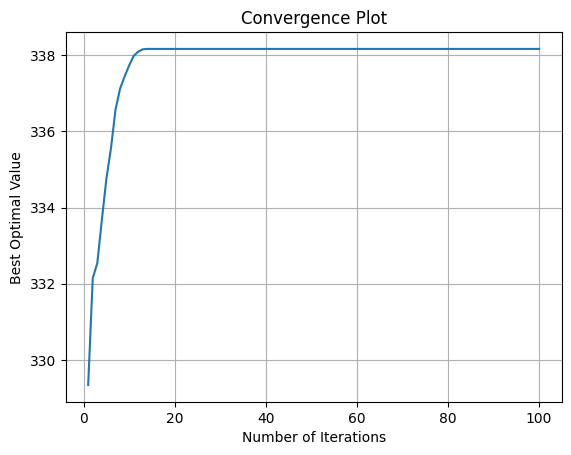

Toff: 53.77107212614244; Ton: 25.0; Sv: 80.0; Ip: 150.0
KW: 338.16633568007677


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Define constants for SPOT
vishnu = 1  # 0 for multi, 1 for KW and so on, 6 for CE single objective

c1 = 338.1663
c2 = 0.7991
c3 = 23.2594
c4 = 39.061
c5 = 525.928
c6 = 1281.745

def switch_vishnu(vishnu):
    switch_dict = {
        0: (1/6,1/6,1/6,1/6,1/6,1/6),
        1: (1, 0, 0, 0, 0, 0),
        2: (0, 1, 0, 0, 0, 0),
        3: (0, 0, 1, 0, 0, 0),
        4: (0, 0, 0, 1, 0, 0),
        5: (0, 0, 0, 0, 1, 0),
        6: (0, 0, 0, 0, 0, 1)
    }

    return switch_dict.get(vishnu, (0, 0, 0, 0, 0, 0))


def switch_case(vishnu):
    switch_dict = {
        1: 'KW',
        2: 'PCV',
        3: 'SR',
        4: 'ED',
        5: 'LE',
        6: 'CE'
    }

    return switch_dict.get(vishnu, '')

w1, w2, w3, w4, w5, w6 = switch_vishnu(vishnu)

# Define constants for PSO
num_particles = 10
num_iterations = 100
w = 0.5
c1_pso = 1.5
c2_pso = 1.5

# Define bounds for variables A, B, C, D
l_bounds = np.array([51, 5, 40, 70])
u_bounds = np.array([63, 25, 80, 150])

def objective_function_multi(x):
    Toff, Ton, Sv, Ip = x
    KW = 81 + 6.66*Toff + 0.19*Ton + 0.665*Sv + 0.311*Ip - 0.0522*Toff*Toff + 0.0002*Ton*Ton - 0.00044*Sv*Sv - 0.000293*Ip*Ip - 0.0060*Toff*Ton - 0.00346*Toff*Sv - 0.00413*Toff*Ip- 0.00025*Ton*Sv + 0.00727*Ton*Ip - 0.00132*Sv*Ip
    PCV = 29.8 - 0.942*Toff + 0.327*Ton - 0.1848*Sv + 0.0769*Ip + 0.00733*Toff*Toff + 0.00018*Ton*Ton + 0.000505*Sv*Sv + 0.000006*Ip*Ip - 0.00321*Toff*Ton + 0.002936*Toff*Sv - 0.001016*Toff*Ip - 0.002419*Ton*Sv + 0.000788*Ton*Ip - 0.000348*Sv*Ip
    SR = -55.7 + 1.97*Toff + 1.011*Ton + 0.223*Sv + 0.123*Ip - 0.0195*Toff*Toff - 0.00414*Ton*Ton - 0.00223*Sv*Sv - 0.000372*Ip*Ip - 0.00998*Toff*Ton + 0.00155*Toff*Sv - 0.00050*Toff*Ip - 0.00574*Ton*Sv + 0.003548*Ton*Ip - 0.000498*Sv*Ip
    ED = 56.3 - 1.93*Toff + 0.908*Ton + 0.575*Sv + 0.230*Ip + 0.0161*Toff*Toff + 0.00243*Ton*Ton - 0.00221*Sv*Sv - 0.000953*Ip*Ip - 0.00252*Toff*Ton - 0.00391*Toff*Sv + 0.00025*Toff*Ip - 0.00929*Ton*Sv + 0.001208*Ton*Ip - 0.000628*Sv*Ip
    LE= 213 + 2.5*Toff + 1.17*Ton + 0.35*Sv + 1.882*Ip + 0.018*Toff*Toff + 0.1621*Ton*Ton - 0.0034*Sv*Sv + 0.00035*Ip*Ip - 0.0413*Toff*Ton + 0.0088*Toff*Sv - 0.0246*Toff*Ip - 0.0017*Ton*Sv - 0.02156*Ton*Ip - 0.00285*Sv*Ip
    CE = 17673 - 578*Toff + 37.1*Ton - 20.4*Sv + 3.9*Ip + 4.83*Toff*Toff - 0.282*Ton*Ton - 0.032*Sv*Sv - 0.0235*Ip*Ip - 0.837*Toff*Ton + 0.476*Toff*Sv - 0.019*Toff*Ip - 0.194*Ton*Sv + 0.342*Ton*Ip - 0.0439*Sv*Ip

    # Calculate the objective value
    optimal = w1 * KW / c1 - w2 * PCV / c2 + w3 * SR / c3 + w4 * ED / c4 + w5 * LE / c5 + w6 * CE / c6

    return optimal

def objective_function_single(x):
    Toff, Ton, Sv, Ip = x
    KW = 81 + 6.66*Toff + 0.19*Ton + 0.665*Sv + 0.311*Ip - 0.0522*Toff*Toff + 0.0002*Ton*Ton - 0.00044*Sv*Sv - 0.000293*Ip*Ip - 0.0060*Toff*Ton - 0.00346*Toff*Sv - 0.00413*Toff*Ip- 0.00025*Ton*Sv + 0.00727*Ton*Ip - 0.00132*Sv*Ip
    PCV = 29.8 - 0.942*Toff + 0.327*Ton - 0.1848*Sv + 0.0769*Ip + 0.00733*Toff*Toff + 0.00018*Ton*Ton + 0.000505*Sv*Sv + 0.000006*Ip*Ip - 0.00321*Toff*Ton + 0.002936*Toff*Sv - 0.001016*Toff*Ip - 0.002419*Ton*Sv + 0.000788*Ton*Ip - 0.000348*Sv*Ip
    SR = -55.7 + 1.97*Toff + 1.011*Ton + 0.223*Sv + 0.123*Ip - 0.0195*Toff*Toff - 0.00414*Ton*Ton - 0.00223*Sv*Sv - 0.000372*Ip*Ip - 0.00998*Toff*Ton + 0.00155*Toff*Sv - 0.00050*Toff*Ip - 0.00574*Ton*Sv + 0.003548*Ton*Ip - 0.000498*Sv*Ip
    ED = 56.3 - 1.93*Toff + 0.908*Ton + 0.575*Sv + 0.230*Ip + 0.0161*Toff*Toff + 0.00243*Ton*Ton - 0.00221*Sv*Sv - 0.000953*Ip*Ip - 0.00252*Toff*Ton - 0.00391*Toff*Sv + 0.00025*Toff*Ip - 0.00929*Ton*Sv + 0.001208*Ton*Ip - 0.000628*Sv*Ip
    LE= 213 + 2.5*Toff + 1.17*Ton + 0.35*Sv + 1.882*Ip + 0.018*Toff*Toff + 0.1621*Ton*Ton - 0.0034*Sv*Sv + 0.00035*Ip*Ip - 0.0413*Toff*Ton + 0.0088*Toff*Sv - 0.0246*Toff*Ip - 0.0017*Ton*Sv - 0.02156*Ton*Ip - 0.00285*Sv*Ip
    CE = 17673 - 578*Toff + 37.1*Ton - 20.4*Sv + 3.9*Ip + 4.83*Toff*Toff - 0.282*Ton*Ton - 0.032*Sv*Sv - 0.0235*Ip*Ip - 0.837*Toff*Ton + 0.476*Toff*Sv - 0.019*Toff*Ip - 0.194*Ton*Sv + 0.342*Ton*Ip - 0.0439*Sv*Ip

    # Calculate the objective value
    optimal = w1 * KW - w2 * PCV + w3 * SR + w4 * ED + w5 * LE + w6 * CE
    return optimal

# Define PSO algorithm
def pso():
    # Initialize particles with random solutions
    particles = np.random.uniform(low=l_bounds, high=u_bounds, size=(num_particles, len(l_bounds)))
    velocities = np.zeros_like(particles)
    pbest_positions = particles.copy()
    pbest_values = np.full(num_particles, float('-inf'))
    gbest_position = None
    gbest_value = float('-inf')
    best_optimal_history = []

    for iteration in range(num_iterations):
        for i in range(num_particles):
            if vishnu == 0:
                objective_value = objective_function_multi(particles[i])
            else:
                objective_value = objective_function_single(particles[i])

            if objective_value > pbest_values[i]:
                pbest_values[i] = objective_value
                pbest_positions[i] = particles[i].copy()

            if objective_value > gbest_value:
                gbest_value = objective_value
                gbest_position = particles[i].copy()

        best_optimal_history.append(gbest_value)

        for i in range(num_particles):
            r1 = np.random.rand(len(l_bounds))
            r2 = np.random.rand(len(l_bounds))
            velocities[i] = w * velocities[i] + c1_pso * r1 * (pbest_positions[i] - particles[i]) + c2_pso * r2 * (gbest_position - particles[i])
            particles[i] += velocities[i]

            # Ensure particles stay within bounds
            particles[i] = np.maximum(particles[i], l_bounds)
            particles[i] = np.minimum(particles[i], u_bounds)

    return gbest_position, gbest_value, best_optimal_history

# Run PSO algorithm
best_solution, best_optimal, best_optimal_history = pso()

# Plot the best optimal value over iterations
plt.plot(range(1, num_iterations + 1), best_optimal_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Best Optimal Value')
plt.title('Convergence Plot')
plt.grid(True)
plt.show()


if vishnu == 0:
    # Save the results to an Excel file
    results_df = pd.DataFrame({
         'Iteration': range(1, num_iterations + 1),
         'Best_Objective_Value': best_optimal_history})
    results_df.to_excel('PSO_plot_multiobjective.xlsx', index=False)

    Toff = best_solution[0]
    Ton = best_solution[1]
    Sv = best_solution[2]
    Ip = best_solution[3]
    KW = 81 + 6.66*Toff + 0.19*Ton + 0.665*Sv + 0.311*Ip - 0.0522*Toff*Toff + 0.0002*Ton*Ton - 0.00044*Sv*Sv - 0.000293*Ip*Ip - 0.0060*Toff*Ton - 0.00346*Toff*Sv - 0.00413*Toff*Ip- 0.00025*Ton*Sv + 0.00727*Ton*Ip - 0.00132*Sv*Ip
    PCV = 29.8 - 0.942*Toff + 0.327*Ton - 0.1848*Sv + 0.0769*Ip + 0.00733*Toff*Toff + 0.00018*Ton*Ton + 0.000505*Sv*Sv + 0.000006*Ip*Ip - 0.00321*Toff*Ton + 0.002936*Toff*Sv - 0.001016*Toff*Ip - 0.002419*Ton*Sv + 0.000788*Ton*Ip - 0.000348*Sv*Ip
    SR = -55.7 + 1.97*Toff + 1.011*Ton + 0.223*Sv + 0.123*Ip - 0.0195*Toff*Toff - 0.00414*Ton*Ton - 0.00223*Sv*Sv - 0.000372*Ip*Ip - 0.00998*Toff*Ton + 0.00155*Toff*Sv - 0.00050*Toff*Ip - 0.00574*Ton*Sv + 0.003548*Ton*Ip - 0.000498*Sv*Ip
    ED = 56.3 - 1.93*Toff + 0.908*Ton + 0.575*Sv + 0.230*Ip + 0.0161*Toff*Toff + 0.00243*Ton*Ton - 0.00221*Sv*Sv - 0.000953*Ip*Ip - 0.00252*Toff*Ton - 0.00391*Toff*Sv + 0.00025*Toff*Ip - 0.00929*Ton*Sv + 0.001208*Ton*Ip - 0.000628*Sv*Ip
    LE= 213 + 2.5*Toff + 1.17*Ton + 0.35*Sv + 1.882*Ip + 0.018*Toff*Toff + 0.1621*Ton*Ton - 0.0034*Sv*Sv + 0.00035*Ip*Ip - 0.0413*Toff*Ton + 0.0088*Toff*Sv - 0.0246*Toff*Ip - 0.0017*Ton*Sv - 0.02156*Ton*Ip - 0.00285*Sv*Ip
    CE = 17673 - 578*Toff + 37.1*Ton - 20.4*Sv + 3.9*Ip + 4.83*Toff*Toff - 0.282*Ton*Ton - 0.032*Sv*Sv - 0.0235*Ip*Ip - 0.837*Toff*Ton + 0.476*Toff*Sv - 0.019*Toff*Ip - 0.194*Ton*Sv + 0.342*Ton*Ip - 0.0439*Sv*Ip
# Print the best solution and its optimal value
    print("Toff:", best_solution[0], end="; ")
    print("Ton:", best_solution[1], end="; ")
    print("Sv:", best_solution[2], end="; ")
    print("Ip:", best_solution[3])

    print("KW:", KW, end="; ")
    print("PCV:", PCV, end="; ")
    print("SR:", SR, end="; ")
    print("ED:", ED,end="; ")
    print("LE:", LE, end="; ")
    print("CE:", CE)

    print("Best Optimal(Z):", best_optimal)
    printed_values_df = pd.DataFrame({ 'Variable': ['Toff', 'Ton', 'Sv', 'Ip', 'KW', 'PCV', 'SR', 'ED', 'LE', 'CE', 'Best Optimal(Z)'],'Value': [best_solution[0], best_solution[1], best_solution[2], best_solution[3], KW, PCV, SR, ED, LE, CE, best_optimal]})
    printed_values_df.to_excel('/content/PSO_multiobjective_values.xlsx', index=False)
else:
    switch_var = switch_case(vishnu)

    results_df = pd.DataFrame({
         'Iteration': range(1, num_iterations + 1),
         'Best_Objective_Value': best_optimal_history})
    results_df.to_excel('PSO_plot_' + switch_var +'.xlsx', index=False)

    # Print values for single-objective optimization
    Toff = best_solution[0]
    Ton = best_solution[1]
    Sv = best_solution[2]
    Ip = best_solution[3]
    print("Toff:", best_solution[0], end="; ")
    print("Ton:", best_solution[1], end="; ")
    print("Sv:", best_solution[2], end="; ")
    print("Ip:", best_solution[3])
    print(switch_var+':', best_optimal)
    printed_values_df = pd.DataFrame({
    'Variable': ['Toff', 'Ton', 'Sv', 'Ip', switch_var ],
    'Value': [best_solution[0], best_solution[1], best_solution[2], best_solution[3], best_optimal]})
    printed_values_df.to_excel('PSO_singleobjective_'+switch_var+ '.xlsx', index=False)